### Scipy:

Text(0, 0.5, 'Min and max temperature')

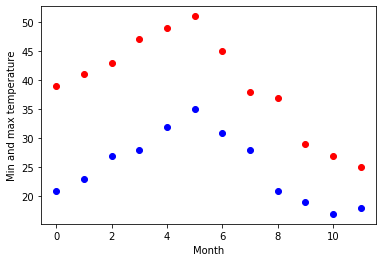

In [1]:
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')



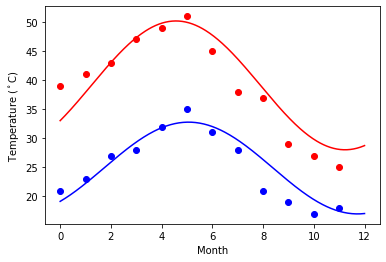

In [2]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure(),
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Matplotlib:

In [3]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
df=pd.read_csv(url)
df.head()

<IPython.core.display.Javascript object>

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.sex[df.sex.isnull() == True]

1309    NaN
Name: sex, dtype: object

In [5]:
df.dropna(how='all', inplace=True)

In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### 1. Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x105535ae148>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'female'),
  Text(0.48083667958064136, -0.9893412391939719, 'male')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

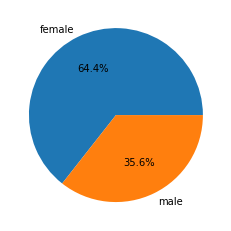

In [7]:
plt.pie(df.sex.value_counts(), labels=df.sex.unique(), autopct='%1.1f%%')

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<IPython.core.display.Javascript object>

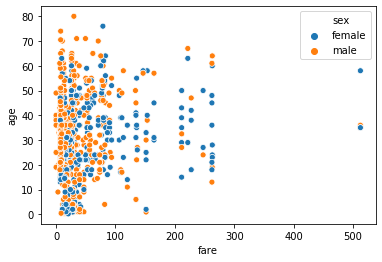

In [8]:
sns.scatterplot(x='fare',y='age',hue='sex',data=df)